In [14]:
# Import the data

import pandas as pd
import matplotlib.pyplot as plt


In [15]:
df_state = pd.read_csv("Total Energy Consumption By State.csv")
df_sector = pd.read_csv("Total Energy Consumption By Sector.csv")

In [16]:
df_state.head()

,State,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AK,"59,303","70,020","76,642","78,488","82,793","85,319","100,481","112,625","119,992",...,"587,460","586,053","602,906","582,922","590,212","593,292","595,231","629,029","688,282","724,059"
1,AL,"842,283","806,682","853,424","885,811","949,411","1,011,125","1,055,347","1,100,904","1,208,038",...,"1,882,362","1,929,314","1,880,544","1,895,744","1,867,484","1,913,464","1,883,941","1,793,090","1,924,516","1,902,374"
2,AR,"417,153","423,192","446,994","474,761","515,874","515,759","553,146","581,814","620,382",...,"1,092,848","1,108,345","1,043,455","1,036,998","1,043,543","1,103,282","1,078,044","1,010,754","1,054,467","1,052,517"
3,AZ,"273,431","294,660","313,581","337,213","357,961","362,858","390,820","400,280","442,172",...,"1,419,110","1,422,839","1,439,724","1,462,217","1,462,699","1,474,472","1,493,085","1,435,329","1,481,293","1,526,882"
4,CA,"3,360,697","3,513,822","3,623,382","3,825,677","4,112,125","4,267,121","4,525,141","4,703,411","4,979,463",...,"7,162,622","7,073,527","7,169,881","7,168,226","7,176,823","7,317,326","7,258,664","6,462,830","6,808,107","6,882,442"


In [17]:
df_sector.head()

,year,industrial,transportation,residential,commercial
0,1950,15.659,8.469,5.736,3.663
1,1951,17.097,9.020,6.124,3.645
2,1952,16.726,8.984,6.286,3.638
3,1953,17.646,9.107,6.297,3.552
4,1954,16.630,8.890,6.589,3.526


In [18]:
# Remove rows/columns to make the years 1970 - 2022

state_cleaned = df_state.drop(df_state.columns[1:11], axis = 1)

state_cleaned.head()

,State,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AK,"179,470","198,395","211,964","194,968","199,194","229,676","251,979","289,893","320,731",...,"587,460","586,053","602,906","582,922","590,212","593,292","595,231","629,029","688,282","724,059"
1,AL,"1,349,405","1,338,719","1,430,589","1,479,232","1,493,276","1,465,789","1,503,723","1,584,720","1,589,735",...,"1,882,362","1,929,314","1,880,544","1,895,744","1,867,484","1,913,464","1,883,941","1,793,090","1,924,516","1,902,374"
2,AR,"691,896","682,389","725,860","801,202","777,116","763,584","818,585","867,684","863,565",...,"1,092,848","1,108,345","1,043,455","1,036,998","1,043,543","1,103,282","1,078,044","1,010,754","1,054,467","1,052,517"
3,AZ,"502,886","534,558","595,492","648,638","650,824","634,126","667,849","720,003","724,401",...,"1,419,110","1,422,839","1,439,724","1,462,217","1,462,699","1,474,472","1,493,085","1,435,329","1,481,293","1,526,882"
4,CA,"5,349,033","5,585,821","5,709,669","5,890,331","5,651,469","5,852,102","6,017,642","6,232,973","6,313,568",...,"7,162,622","7,073,527","7,169,881","7,168,226","7,176,823","7,317,326","7,258,664","6,462,830","6,808,107","6,882,442"


In [19]:
sector_rows_removed = df_sector.drop(df_sector.index[0:20])
sector_cleaned = sector_rows_removed.drop(sector_rows_removed.index[53])
sector_cleaned.head()

,year,industrial,transportation,residential,commercial
20,1970,28.862,16.094,13.178,7.902
21,1971,28.783,16.726,13.606,8.237
22,1972,30.111,17.714,14.213,8.690
23,1973,31.802,18.609,14.252,9.047
24,1974,30.874,18.117,13.932,8.843


In [20]:
sector_cleaned.tail()

,year,industrial,transportation,residential,commercial
68,2018,31.813,28.504,20.023,17.072
69,2019,31.716,28.669,19.575,16.638
70,2020,30.288,24.450,18.795,15.322
71,2021,31.394,27.070,18.991,15.914
72,2022,31.088,27.635,19.496,16.574


In [21]:
# convert the data
# state is in billion btu
# sector is in quadrillion btu, multiply by million, then divide by 3412 to make billions kWh
#sector_columns_label = ["industrial", "transportation","residential","commercial"]
#sector_cleaned[sector_columns_label] = (sector_cleaned[sector_columns_label] * 1e6)/3412

#sector_cleaned.head()


sector_columns_label = ["industrial", "transportation","residential","commercial"]
sector_cleaned[sector_columns_label] = (sector_cleaned[sector_columns_label] * 1e6)/3412

sector_cleaned.head()


,year,industrial,transportation,residential,commercial
20,1970,8458.968347,4716.881594,3862.250879,2315.943728
21,1971,8435.814771,4902.110199,3987.690504,2414.126612
22,1972,8825.029308,5191.676436,4165.592028,2546.893318
23,1973,9320.633060,5453.985932,4177.022274,2651.524033
24,1974,9048.651817,5309.788980,4083.235639,2591.735053


In [22]:
# convert state data, its in billions of btus so divide by 3412
state_cleaned.head()
state_cleaned.iloc[:, 1:] = state_cleaned.iloc[:, 1:].replace({',': '', ' ': ''}, regex=True)
state_cleaned.iloc[:, 1:] = state_cleaned.iloc[:, 1:].astype(float)
state_cleaned.iloc[:, 1:] = state_cleaned.iloc[:, 1:]/3412
state_cleaned.head(15)

,State,1970,1971,1972,1973,1974,1975,1976,1977,1978,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AK,52.599648,58.146249,62.123095,57.141852,58.380422,67.314185,73.850821,84.962778,94.000879,...,172.174678,171.762309,176.701641,170.844666,172.981243,173.883939,174.452227,184.357855,201.723916,212.209555
1,AL,395.487984,392.356096,419.281653,433.538101,437.654162,429.598183,440.716002,464.454865,465.924678,...,551.688746,565.44959,551.15592,555.610785,547.328253,560.80422,552.151524,525.524619,564.043376,557.553927
2,AR,202.783118,199.996776,212.737397,234.818875,227.759672,223.793669,239.91354,254.303634,253.096424,...,320.295428,324.837339,305.819168,303.926729,305.844959,323.353458,315.956624,296.235053,309.0466,308.475088
3,AZ,147.387456,156.669988,174.528722,190.104924,190.745604,185.8517,195.735346,211.020809,212.309789,...,415.917351,417.010258,421.958968,428.55129,428.692556,432.143025,437.598183,420.670868,434.142145,447.503517
4,CA,1567.711899,1637.110492,1673.408265,1726.357268,1656.350821,1715.152989,1763.669988,1826.779894,1850.400938,...,2099.244431,2073.132181,2101.371923,2100.88687,2103.406506,2144.58558,2127.392732,1894.147128,1995.342028,2017.12837
5,CO,194.597304,198.369871,217.132181,230.436108,225.201641,224.255862,234.681125,240.521395,243.769343,...,415.517292,419.092907,421.208382,408.070633,409.112837,423.446073,434.495311,395.267878,407.063013,429.076788
6,CT,197.389215,193.66061,203.897714,211.395662,202.352872,195.46864,211.328546,214.504396,219.388921,...,218.19109,219.368992,221.076495,211.648593,212.50381,219.973036,213.897128,193.525791,203.067995,207.395955
7,DC,58.343787,56.338511,53.328839,54.685229,48.165885,45.751172,46.28898,46.39068,45.115475,...,48.729484,49.823271,49.646249,47.970399,45.481829,47.478898,46.093787,38.723623,40.98476,41.338218
8,DE,62.696659,63.401231,66.368113,70.430246,65.140973,62.287808,65.469812,65.426143,64.684642,...,81.033411,80.958382,82.083529,81.051876,80.357855,85.739156,85.387456,77.225088,82.300996,80.538101
9,FL,443.703107,469.829132,507.114302,562.000293,540.001465,543.209555,580.903869,631.086166,657.80891,...,1203.934936,1217.134525,1261.160903,1271.544842,1266.341442,1291.201055,1269.276377,1156.836166,1245.920281,1267.581184


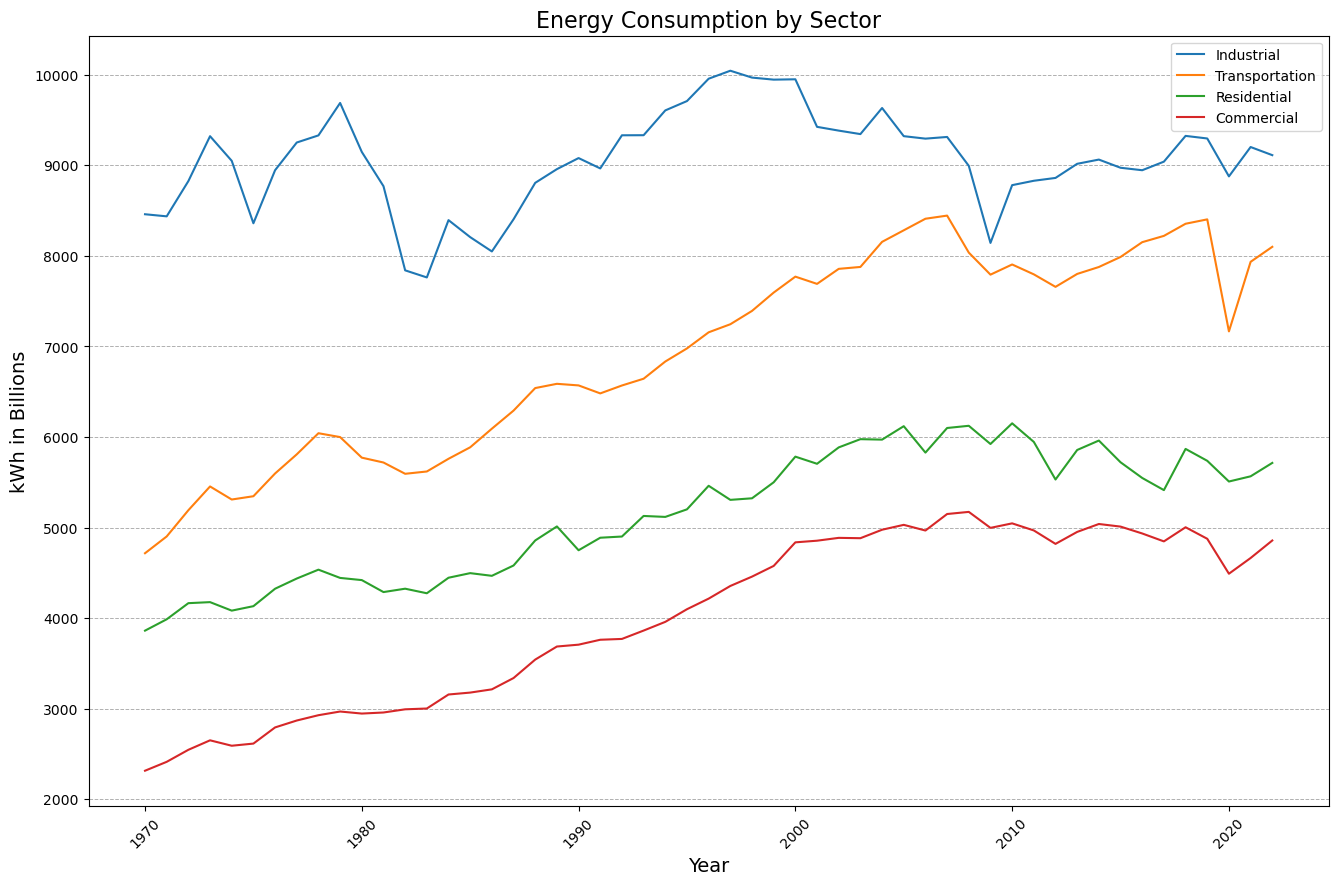

In [23]:
plt.figure(figsize=(16,10))
plt.plot('year', 'industrial', data=sector_cleaned, label='Industrial')
plt.plot('year', 'transportation', data=sector_cleaned, label='Transportation')
plt.plot('year', 'residential', data=sector_cleaned, label='Residential')
plt.plot('year', 'commercial', data=sector_cleaned, label='Commercial')
plt.xlabel("Year", fontsize = 14)
plt.ylabel("kWh in Billions", fontsize = 14)
plt.title("Energy Consumption by Sector", fontsize = 16)
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.legend()
plt.show()

In [24]:
fifteen_year_data = state_cleaned.drop(state_cleaned.columns[1:39], axis = 1)
fifteen_year_data.head(20)

,State,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,AK,188.438159,184.885404,184.631301,185.315944,181.947538,172.174678,171.762309,176.701641,170.844666,172.981243,173.883939,174.452227,184.357855,201.723916,212.209555
1,AL,579.298945,512.850821,558.69109,551.718347,546.136577,551.688746,565.44959,551.15592,555.610785,547.328253,560.80422,552.151524,525.524619,564.043376,557.553927
2,AR,317.186987,298.735639,325.000293,326.805393,312.121043,320.295428,324.837339,305.819168,303.926729,305.844959,323.353458,315.956624,296.235053,309.0466,308.475088
3,AZ,420.177022,395.802755,411.453107,418.940211,411.319168,415.917351,417.010258,421.958968,428.55129,428.692556,432.143025,437.598183,420.670868,434.142145,447.503517
4,CA,2270.995897,2176.274326,2129.395955,2103.902403,2070.725674,2099.244431,2073.132181,2101.371923,2100.88687,2103.406506,2144.58558,2127.392732,1894.147128,1995.342028,2017.12837
5,CO,425.501758,419.103458,433.944021,417.747069,408.318875,415.517292,419.092907,421.208382,408.070633,409.112837,423.446073,434.495311,395.267878,407.063013,429.076788
6,CT,225.737104,223.598183,224.837925,216.810375,212.745604,218.19109,219.368992,221.076495,211.648593,212.50381,219.973036,213.897128,193.525791,203.067995,207.395955
7,DC,52.172333,52.934056,53.990914,51.185522,47.989449,48.729484,49.823271,49.646249,47.970399,45.481829,47.478898,46.093787,38.723623,40.98476,41.338218
8,DE,84.587632,74.929074,77.064478,82.322098,81.990035,81.033411,80.958382,82.083529,81.051876,80.357855,85.739156,85.387456,77.225088,82.300996,80.538101
9,FL,1245.434056,1201.147421,1261.607268,1215.851993,1186.668816,1203.934936,1217.134525,1261.160903,1271.544842,1266.341442,1291.201055,1269.276377,1156.836166,1245.920281,1267.581184


In [28]:
fifteen_year_data.columns

Index(['State', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [36]:

fifteen_year_means = fifteen_year_data.mean(axis =1)
fifteen_year_final = fifteen_year_means.drop(fifteen_year_means.index[51])
print(fifteen_year_final)

State
AK      182.420692
AL      552.000449
AR       312.90932
AZ      422.792028
CA     2093.862134
CO      417.797753
CT      214.958538
DC       47.636186
DE       81.171278
FL     1237.442751
GA      846.850938
HI       82.560336
IA      418.140856
ID      135.246913
IL      1134.01315
IN      802.937456
KS      304.066335
KY      518.784408
LA     1202.537964
MA      402.765748
MD      393.013228
ME      109.381477
MI      811.904826
MN      524.439371
MO      528.183744
MS      322.301602
MT      111.279152
NC      747.165533
ND      165.943591
NE      245.923974
NH       87.834818
NJ      634.172196
NM      194.742165
NV      197.215338
NY     1038.883001
OH     1065.965279
OK      447.377843
OR      235.711606
PA     1097.943826
RI       55.478195
SC      472.005471
SD       99.772763
TN      613.436831
TX     3652.761684
UT      232.449726
VA      702.812349
VT       39.362231
WA      457.107776
WI      521.634975
WV      225.072255
WY      151.643025
dtype: object


In [41]:
fifteen_year_final.tail()

State
VT      39.362231
WA     457.107776
WI     521.634975
WV     225.072255
WY     151.643025
dtype: object

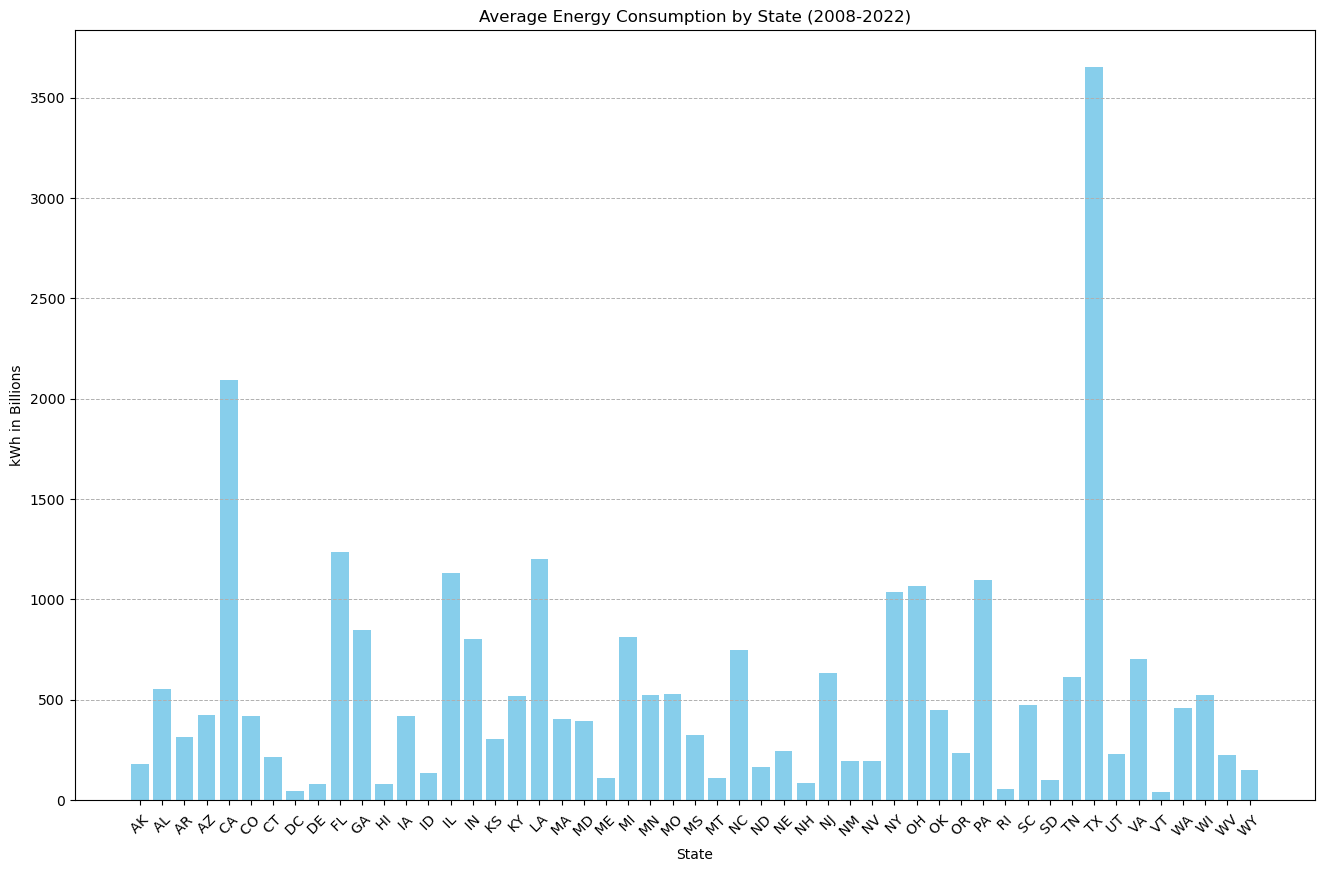

In [51]:
plt.figure(figsize=(16,10))
plt.bar(fifteen_year_final.index, fifteen_year_final.values, color = "skyblue")

plt.xlabel("State")
plt.ylabel("kWh in Billions")
plt.title("Average Energy Consumption by State (2008-2022)")
plt.xticks(rotation=45)
plt.grid(True, which='both', axis='y', linestyle='--', linewidth=0.7)
plt.show()